# Условия домашки

В рамках этого домашнего задания вы поработаете с данными по платежам и проведете сегментацию пользователей.

1. Скачайте файлы с данными.

> **Описание данных:**
> 
> - device_client:  
> id_client - уникальный идентификатор клиента  
> type - тип устройства, с которого клиент регистрировался
>
> - payment_client:  
> id_client - уникальный идентификатор клиента  
> amt_pay - суммарный размер платежа за последние полгода  

2. Постройте распределение клиентских платежей (с помощью гистограммы) и оцените,  насколько данное распределение похоже на нормальное с помощью правила трех сигм (а также одной и двух сигм).

3. Проведите такой же анализ близости к нормальному распределению для каждого типа устройства клиентов по отдельности.  Платежи по какому типу устройства больше всего похожи на нормальное распределение?

4. Создайте датафрейм df_res со следующей структурой:

> Каждая строка показывает свой тип устройства (итого 3 строки).
>
> Колонки:  
> - Тип устройства  
> - Процент выборки внутри среднее плюс-минус одна сигма (1sigma)    
> - Процент выборки внутри среднее плюс-минус две сигмы (2sigma)  
> - Процент выборки внутри среднее плюс-минус три сигмы (3sigma)  
> - Разница по сравнению с соответствующим показателем нормального распределения - 68% (diff1sigma)  
> - Разница по сравнению с соответствующим показателем нормального распределения - 95% (diff2sigma)  
> - Разница по сравнению с соответствующим показателем нормального распределения - 99.7% (diff3sigma)  


**Задание со звездочкой**

Что если типов устройства не 3, а 100?  
Придумайте, как автоматизировать и масштабировать свои вычисления,  
чтобы на выходе получался такой же датафрейм *df_res,* но с сотней строк.

*Для этого вам может понадобиться создание функций и циклов.*

# Решение:

## Установка и импорт всех необходимых библиотек

In [1]:
# для работы со структурами данных
import numpy as np
import pandas as pd
import scipy.stats as stats

# для графического отображения данных
from matplotlib import pyplot as plt
import seaborn as sns

### Задание 1. Импорт в блокнот всех данных из файлов

In [2]:
df_device = pd.read_csv('device_client.csv', sep=';')
df_payment = pd.read_csv('payment_client.csv', sep=';')

In [3]:
# проверим что мы загрузили
df_device.sample(5)

,id_client,type
618,18720,ios
731,19127,PC
28,18457,PC
64,19059,ios
285,18907,ios


In [4]:
df_payment.sample(5)

,id_client,amt_pay
683,19027,7647
763,18996,2532
571,18432,4986
167,18730,3864
373,18973,541


### Задание 2. Постройте распределение клиентских платежей

Постройте распределение клиентских платежей (с помощью гистограммы) и оцените,  
насколько данное распределение похоже на нормальное с помощью правила трех сигм (а также одной и двух сигм).

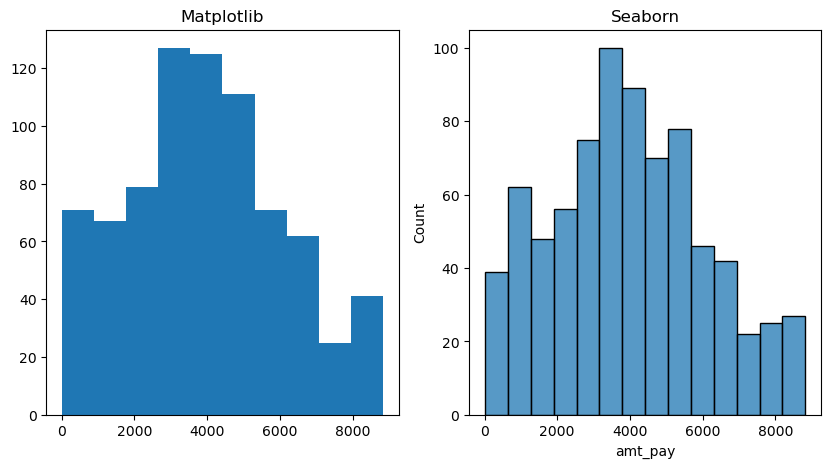

In [5]:
# сравниваю две библиотеки с настройками по умолчанию

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Matplotlib')
ax2.set_title('Seaborn')

ax1.hist(df_payment['amt_pay'])
sns.histplot(ax=ax2, data=df_payment, x="amt_pay")

plt.show()

In [6]:
m = df_payment['amt_pay'].mean()    # Вычисление среднего значения
s = df_payment['amt_pay'].std()     # Вычисление стандартного отклонения - сигма

print('Среднее = ', m)
print('Сигма = ', s)

Среднее =  3961.2182284980745
Сигма =  2124.655341443493


**Правило трех сигм**

Распределение считается нормальным если соблюдаются следующие условия

|наблюдение|комментарий|
|:---|:---|
|$1\sigma = 68\%$|68% наблюдений попадают в интервал +/- 1 сигма от среднего|
|$2\sigma = 95\%$|95% наблюдений попадают в интервал +/- 2 сигмы от среднего|
|$3\sigma = 99.7\%$|99.7% наблюдений попадают в интервал +/- 3 сигмы от среднего|

In [7]:
# DataFrame из +/- 1 сигма от среднего
df_one_sigma = df_payment[(df_payment['amt_pay'] >= m - s) & (df_payment['amt_pay'] <= m + s)]
act_div_one_sigma = df_one_sigma['id_client'].count() / df_payment['id_client'].count()
req_div_one_sigma = 0.68
print(f"Доля наблюдений в 1 сигме {round(act_div_one_sigma, 2)}, для нормального распр. необходимо {req_div_one_sigma}")

# DataFrame из +/- 2 сигма от среднего
df_two_sigma = df_payment[(df_payment['amt_pay'] >= m - 2*s) & (df_payment['amt_pay'] <= m + 2*s)]
act_div_two_sigma = df_two_sigma['id_client'].count() / df_payment['id_client'].count()
req_div_two_sigma = 0.95
print(f"Доля наблюдений в 2 сигме {round(act_div_two_sigma, 2)}, для нормального распр. необходимо {req_div_two_sigma}")

# DataFrame из +/- 3 сигма от среднего
df_three_sigma = df_payment[(df_payment['amt_pay'] >= m - 3*s) & (df_payment['amt_pay'] <= m + 3*s)]
act_div_three_sigma = df_three_sigma['id_client'].count() / df_payment['id_client'].count()
req_div_three_sigma = 0.97
print(f"Доля наблюдений в 3 сигме {round(act_div_three_sigma, 2)}, для нормального распр. необходимо {req_div_three_sigma}")

Доля наблюдений в 1 сигме 0.65, для нормального распр. необходимо 0.68
Доля наблюдений в 2 сигме 0.97, для нормального распр. необходимо 0.95
Доля наблюдений в 3 сигме 1.0, для нормального распр. необходимо 0.97


**Вывод:** распределение из таблицы близко к нормальному

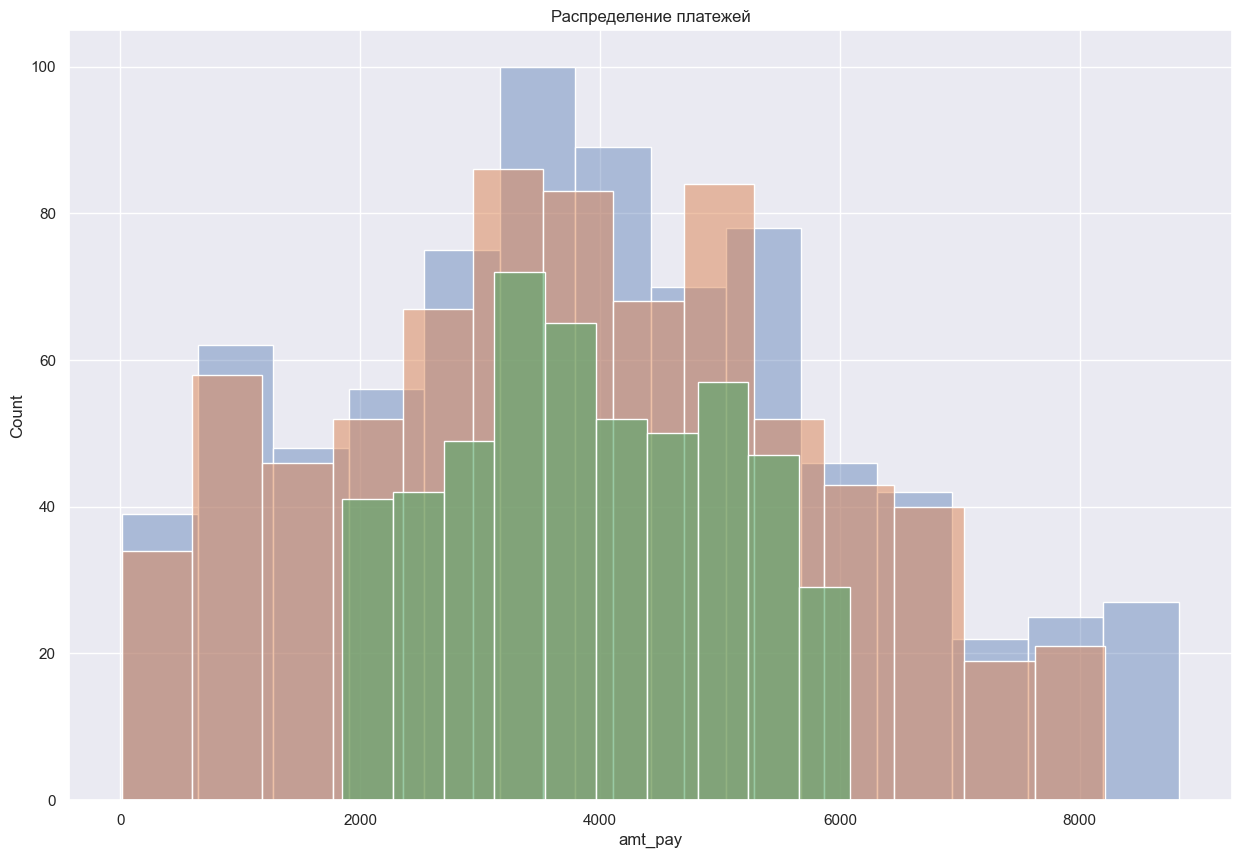

In [8]:
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Распределение платежей')

sns.histplot(data=df_three_sigma, x='amt_pay', alpha=0.4)
sns.histplot(data=df_two_sigma, x='amt_pay', alpha=0.5)
sns.histplot(data=df_one_sigma, x='amt_pay', alpha=0.6)

plt.show()

### Задание 3.  Постройте распределение клиентских платежей для каждого типа устройств

Проведите такой же анализ близости к нормальному распределению для каждого типа устройства клиентов по отдельности. Платежи по какому типу устройства больше всего похожи на нормальное распределение?

In [9]:
df_device.head(2)

,id_client,type
0,19091,ios
1,18768,PC


In [10]:
df_payment.head(2)

,id_client,amt_pay
0,18788,24
1,19059,3743


***Обьединяем две таблицы по общей колонке***

In [11]:
df = pd.merge(df_payment, df_device, how='outer', on='id_client')
df.sample(5)

,id_client,amt_pay,type
238,18936,6945,ios
725,18642,2046,android
776,18462,6172,android
211,19030,327,ios
27,18513,2190,PC


***Получим список всех устройств***

In [12]:
typs_devices = list(set(df['type']))
typs_devices

['android', 'ios', 'PC']

**Создаем DataFrame для каждого типа устройств**

In [13]:
df_None = df.loc[df['type'] == None, ['id_client', 'amt_pay']]
df_None.head(5)

,id_client,amt_pay


In [14]:
df_ios = df.loc[df['type'] == 'ios', ['id_client', 'amt_pay']]
df_ios.head(5)

,id_client,amt_pay
0,18788,24
1,19059,3743
3,18795,2202
8,19098,8141
10,18747,700


In [15]:
df_pc = df.loc[df['type'] == 'PC', ['id_client', 'amt_pay']]
df_pc.head(5)

,id_client,amt_pay
6,18967,3600
14,19052,3400
21,19100,936
22,18452,5107
24,18561,1390


In [16]:
df_android = df.loc[df['type'] == 'android', ['id_client', 'amt_pay']]
df_android.head(5)

,id_client,amt_pay
2,18785,8185
4,18818,3377
5,18662,1650
7,18619,8621
9,18792,5549


In [17]:
# Для DataFrame с данными от устройств на Ios
m_df_ios = df_ios['amt_pay'].mean()    # Вычисление среднего значения
s_df_ios = df_ios['amt_pay'].std()     # Вычисление стандартного отклонения - сигма
print(f'IOS \t среднее {round(m_df_ios, 2)},\n\t сигма {round(s_df_ios, 2)}\n')

# Для DataFrame с данными от устройств на PC
m_df_pc = df_pc['amt_pay'].mean()    # Вычисление среднего значения
s_df_pc = df_pc['amt_pay'].std()     # Вычисление стандартного отклонения - сигма
print(f'PC \t среднее {round(m_df_pc, 2)},\n\t сигма {round(s_df_pc, 2)}\n')

# Для DataFrame с данными от устройств на Android
m_df_android = df_android['amt_pay'].mean()    # Вычисление среднего значения
s_df_android = df_android['amt_pay'].std()     # Вычисление стандартного отклонения - сигма
print(f'Android среднее {round(m_df_android, 2)},\n\t сигма {round(s_df_android, 2)}\n')

IOS 	 среднее 4589.92,
	 сигма 2218.09

PC 	 среднее 3250.32,
	 сигма 1684.22

Android среднее 3996.07,
	 сигма 2203.32



In [18]:
def if_normally_distributed(df: pd.DataFrame, col: str, view_info=False) -> bool:
    """
    Проверяет соответствие выборки условию нормального распределения,  если соответствует трем сигма то возвращает True
    """
    req_div_1sigma = 0.68
    req_div_2sigma = 0.95
    req_div_3sigma = 0.97
    
    m = df[col].mean()
    s = df[col].std()
    
    df_1sigma = df[(df[col] >= m - s)     & (df[col] <= m + s)]
    df_2sigma = df[(df[col] >= m - 2 * s) & (df[col] <= m + 2 * s)]
    df_3sigma = df[(df[col] >= m - 3 * s) & (df[col] <= m + 3 * s)]
    
    act_div_1sigma = df_1sigma[col].count() / len(df)
    act_div_2sigma = df_2sigma[col].count() / len(df)
    act_div_3sigma = df_3sigma[col].count() / len(df)
    
    if view_info:
        print(f'1 sigma:\nДоля выборки фактическая {round(act_div_1sigma, 2)}\nДоля выборки при нормальном распределении {req_div_1sigma}\n')
        print(f'2 sigma:\nДоля выборки фактическая {round(act_div_2sigma, 2)}\nДоля выборки при нормальном распределении {req_div_2sigma}\n')
        print(f'3 sigma:\nДоля выборки фактическая {round(act_div_3sigma, 2)}\nДоля выборки при нормальном распределении {req_div_3sigma}\n')
    
    if_s1 = True if act_div_1sigma >= req_div_1sigma else False
    if_s2 = True if act_div_2sigma >= req_div_2sigma else False
    if_s3 = True if act_div_3sigma >= req_div_3sigma else False
    
    return if_s1 and if_s2 and if_s3

In [19]:
if_normally_distributed(df_ios, 'amt_pay', True)

1 sigma:
Доля выборки фактическая 0.63
Доля выборки при нормальном распределении 0.68

2 sigma:
Доля выборки фактическая 0.99
Доля выборки при нормальном распределении 0.95

3 sigma:
Доля выборки фактическая 1.0
Доля выборки при нормальном распределении 0.97



False

In [20]:
if_normally_distributed(df_pc, 'amt_pay', True)

1 sigma:
Доля выборки фактическая 0.67
Доля выборки при нормальном распределении 0.68

2 sigma:
Доля выборки фактическая 0.97
Доля выборки при нормальном распределении 0.95

3 sigma:
Доля выборки фактическая 0.98
Доля выборки при нормальном распределении 0.97



False

In [21]:
if_normally_distributed(df_android, 'amt_pay', True)

1 sigma:
Доля выборки фактическая 0.63
Доля выборки при нормальном распределении 0.68

2 sigma:
Доля выборки фактическая 0.98
Доля выборки при нормальном распределении 0.95

3 sigma:
Доля выборки фактическая 1.0
Доля выборки при нормальном распределении 0.97



False

**Вывод:** ни одно из распределение из таблиц не является истинным нормальным распределением удовлетворяющим условию трех сигм, однако самый близкий к нормальному распределению оказался DataFrame с устройств на базе PC

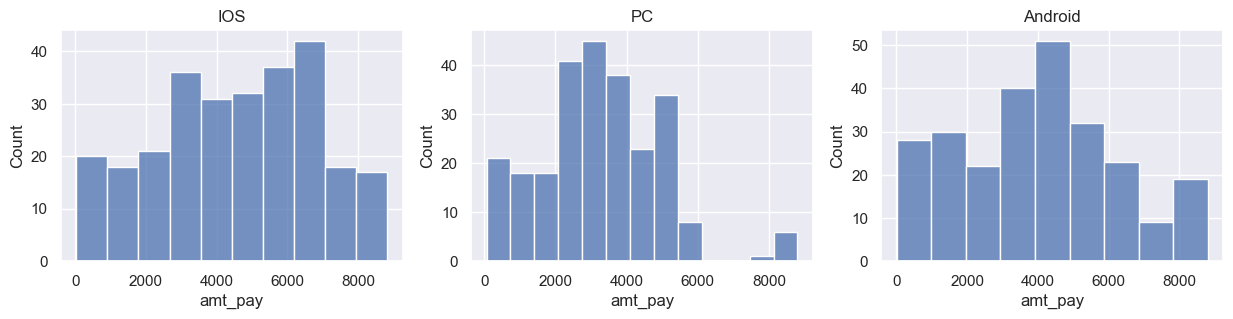

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

sns.histplot(ax=axs[0], data=df_ios, x='amt_pay')
sns.histplot(ax=axs[1], data=df_pc, x='amt_pay')
sns.histplot(ax=axs[2], data=df_android, x='amt_pay')

axs[0].set_title('IOS')
axs[1].set_title('PC')
axs[2].set_title('Android')

plt.show()

# Задание 4. Создайте датафрейм df_res со структурой

Создайте датафрейм df_res со следующей структурой:

Каждая строка показывает свой тип устройства (итого 3 строки).

Колонки:

- Тип устройства  
- Процент выборки внутри среднее плюс-минус одна сигма (1sigma)  
- Процент выборки внутри среднее плюс-минус две сигмы (2sigma)  
- Процент выборки внутри среднее плюс-минус три сигмы (3sigma)  
- Разница по сравнению с соответствующим показателем нормального распределения - 68% (diff1sigma)  
- Разница по сравнению с соответствующим показателем нормального распределения - 95% (diff2sigma)  
- Разница по сравнению с соответствующим показателем нормального распределения - 99.7% (diff3sigma)  

In [23]:
df

,id_client,amt_pay,type
0,18788,24,ios
1,19059,3743,ios
2,18785,8185,android
3,18795,2202,ios
4,18818,3377,android
...,...,...,...
774,18516,6736,ios
775,18826,5079,android
776,18462,6172,android
777,18694,7619,ios


In [24]:
# 1. Создаем датафрейм df_res
# 2. добавляем колонку: Тип устройства

df_res = pd.DataFrame({
    'type': list(set(df['type']))
})

df_res

,type
0,android
1,ios
2,PC


In [25]:
# 3. добавляем колонку: Процент выборки внутри среднее плюс-минус одна сигма (1sigma)

one_sigma = []

for tp in df_res['type']:
    df_work = df[df['type'] == tp]
    
    m = df_work['amt_pay'].mean()
    s = df_work['amt_pay'].std()
    
    df_1sigma = df_work[(df_work['amt_pay'] >= m - s) & (df_work['amt_pay'] <= m + s)]
    act_div_1sigma = df_1sigma['amt_pay'].count() / len(df_work)
    
    one_sigma.append(act_div_1sigma * 100)
    
df_res['1sigma'] = one_sigma
df_res

,type,1sigma
0,android,62.992126
1,ios,62.867647
2,PC,66.798419


In [26]:
# 4. добавляем колонку: Процент выборки внутри среднее плюс-минус две сигмы (2sigma)

two_sigma = []

for tp in df_res['type']:
    df_work = df[df['type'] == tp]
    
    m = df_work['amt_pay'].mean()
    s = df_work['amt_pay'].std()
    
    df_2sigma = df_work[(df_work['amt_pay'] >= m - 2 * s) & (df_work['amt_pay'] <= m + 2 * s)]
    act_div_2sigma = df_2sigma['amt_pay'].count() / len(df_work)
    
    two_sigma.append(act_div_2sigma * 100)
    
df_res['2sigma'] = two_sigma
df_res

,type,1sigma,2sigma
0,android,62.992126,98.031496
1,ios,62.867647,98.897059
2,PC,66.798419,97.233202


In [27]:
# 5. добавляем колонку: Процент выборки внутри среднее плюс-минус три сигмы (3sigma)

three_sigma = []

for tp in df_res['type']:
    df_work = df[df['type'] == tp]
    
    m = df_work['amt_pay'].mean()
    s = df_work['amt_pay'].std()
    
    df_3sigma = df_work[(df_work['amt_pay'] >= m - 3 * s) & (df_work['amt_pay'] <= m + 3 * s)]
    act_div_3sigma = df_3sigma['amt_pay'].count() / len(df_work)
    
    three_sigma.append(act_div_3sigma * 100)
    
df_res['3sigma'] = three_sigma
df_res

,type,1sigma,2sigma,3sigma
0,android,62.992126,98.031496,100.000000
1,ios,62.867647,98.897059,100.000000
2,PC,66.798419,97.233202,98.023715


In [28]:
# 6. добавляем колонку: Разница по сравнению с соответствующим показателем нормального распределения - 68% (diff1sigma)

df_res['diff1sigma'] = 68 - df_res['1sigma']
df_res

,type,1sigma,2sigma,3sigma,diff1sigma
0,android,62.992126,98.031496,100.000000,5.007874
1,ios,62.867647,98.897059,100.000000,5.132353
2,PC,66.798419,97.233202,98.023715,1.201581


In [29]:
# 7. добавляем колонку: Разница по сравнению с соответствующим показателем нормального распределения - 95% (diff2sigma)

df_res['diff2sigma'] = 95 - df_res['2sigma']
df_res

,type,1sigma,2sigma,3sigma,diff1sigma,diff2sigma
0,android,62.992126,98.031496,100.000000,5.007874,-3.031496
1,ios,62.867647,98.897059,100.000000,5.132353,-3.897059
2,PC,66.798419,97.233202,98.023715,1.201581,-2.233202


In [30]:
# 8. добавляем колонку: Разница по сравнению с соответствующим показателем нормального распределения - 99.7% (diff3sigma

df_res['diff3sigma'] = 99.7 - df_res['3sigma']
df_res

,type,1sigma,2sigma,3sigma,diff1sigma,diff2sigma,diff3sigma
0,android,62.992126,98.031496,100.000000,5.007874,-3.031496,-0.300000
1,ios,62.867647,98.897059,100.000000,5.132353,-3.897059,-0.300000
2,PC,66.798419,97.233202,98.023715,1.201581,-2.233202,1.676285


**Ответ:**

In [31]:
df_res

,type,1sigma,2sigma,3sigma,diff1sigma,diff2sigma,diff3sigma
0,android,62.992126,98.031496,100.000000,5.007874,-3.031496,-0.300000
1,ios,62.867647,98.897059,100.000000,5.132353,-3.897059,-0.300000
2,PC,66.798419,97.233202,98.023715,1.201581,-2.233202,1.676285


# **Задание со звездочкой**

Что если типов устройства не 3, а 100?  
Придумайте, как автоматизировать и масштабировать свои вычисления,  
чтобы на выходе получался такой же датафрейм df_res, но с сотней строк.  

Для этого вам может понадобиться создание функций и циклов.

In [32]:
def func(df: pd.DataFrame, group_by: str, column: str) -> pd.DataFrame:
    '''Создает DataFrame с оценкой соответствия нормальному распределению исходного DataFrame'''
    
    df_r = pd.DataFrame({group_by: list(set(df[group_by]))})
    sigma1 = []
    sigma2 = []
    sigma3 = []

    for tp in df_r[group_by]:
        df_work = df[df[group_by] == tp]
    
        m = df_work[column].mean()
        s = df_work[column].std()
    
        df_1sigma = df_work[(df_work[column] >= m - s) & (df_work[column] <= m + s)]
        df_2sigma = df_work[(df_work[column] >= m - 2 * s) & (df_work[column] <= m + 2 * s)]
        df_3sigma = df_work[(df_work[column] >= m - 3 * s) & (df_work[column] <= m + 3 * s)]
            
        act_div_1sigma = df_1sigma[column].count() / len(df_work)
        act_div_2sigma = df_2sigma[column].count() / len(df_work)
        act_div_3sigma = df_3sigma[column].count() / len(df_work)
    
        sigma1.append(act_div_1sigma * 100)
        sigma2.append(act_div_2sigma * 100)
        sigma3.append(act_div_3sigma * 100)
    
    df_r['1sigma'] = sigma1
    df_r['2sigma'] = sigma2
    df_r['3sigma'] = sigma3
    df_r['diff1sigma'] = 68 - df_res['1sigma']
    df_r['diff2sigma'] = 95 - df_res['2sigma']
    df_r['diff3sigma'] = 99.7 - df_res['3sigma']
    
    return df_r

**Проверка задания со звездочкой**

In [33]:
func(df, 'type', 'amt_pay')

,type,1sigma,2sigma,3sigma,diff1sigma,diff2sigma,diff3sigma
0,android,62.992126,98.031496,100.000000,5.007874,-3.031496,-0.300000
1,ios,62.867647,98.897059,100.000000,5.132353,-3.897059,-0.300000
2,PC,66.798419,97.233202,98.023715,1.201581,-2.233202,1.676285


In [34]:
func(df[(df['type'] == 'ios') | (df['type'] == 'PC')], 'type', 'amt_pay')

,type,1sigma,2sigma,3sigma,diff1sigma,diff2sigma,diff3sigma
0,ios,62.867647,98.897059,100.000000,5.007874,-3.031496,-0.3
1,PC,66.798419,97.233202,98.023715,5.132353,-3.897059,-0.3


In [35]:
func(df.iloc[[0]], 'type', 'amt_pay')

,type,1sigma,2sigma,3sigma,diff1sigma,diff2sigma,diff3sigma
0,ios,0.0,0.0,0.0,5.007874,-3.031496,-0.3


In [36]:
func(df[df['type'].isin(['ios', 'android'])], 'type', 'amt_pay')

,type,1sigma,2sigma,3sigma,diff1sigma,diff2sigma,diff3sigma
0,android,62.992126,98.031496,100.0,5.007874,-3.031496,-0.3
1,ios,62.867647,98.897059,100.0,5.132353,-3.897059,-0.3
